# Author: Ranjeeta Bhattacharya

Description: This notebook aims to analyze a set of financial dataset(s) and use predictive modelling techniques to determine the probability of a loan turning into default.

In [1005]:
## Importing necessary libraries required for analysis

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import copy

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

#from imblearn.over_sampling import SMOTE

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [1006]:
## Checking the list of input files available for analysis

print(os.listdir("./data_berka/"))

['account.asc', 'card.asc', 'order.asc', 'disp.asc', 'account_test.csv', 'loan.asc', 'client.asc', 'district.asc', 'trans.asc']


In [1007]:
## Reading all data files provided for analysis and converting to csv format

account = pd.read_csv("./data_berka/account.asc", sep = ';', engine = "python")
card = pd.read_csv("./data_berka/card.asc", sep = ';', engine = "python")
order = pd.read_csv("./data_berka/order.asc", sep = ';', engine = "python")
disp = pd.read_csv("./data_berka/disp.asc", sep = ';', engine = "python")
loan = pd.read_csv("./data_berka/loan.asc", sep = ';', engine = "python")
client = pd.read_csv("./data_berka/client.asc", sep = ';', engine = "python")
district = pd.read_csv("./data_berka/district.asc", sep = ';', engine = "python")
trans = pd.read_csv("./data_berka/trans.asc", sep = ';', engine = "python")
account_test = pd.read_csv("./data_berka/account_test.csv")

## Creating a list of all 8 dataframes

files_set = [account, card, order, disp, loan, client, district, trans]
files_name = ['account', 'card', 'order', 'disp', 'loan', 'client', 'district', 'trans']

In [1008]:
## Checking individual file structure for all dataframes

for id, item in enumerate (files_set): 
    print ('Dataframe name: ' + str (files_name [id]))
    display (item.head (n=10))
    print ('\n')

Dataframe name: account


account_id  district_id           frequency    date
0         576           55    POPLATEK MESICNE  930101
1        3818           74    POPLATEK MESICNE  930101
2         704           55    POPLATEK MESICNE  930101
3        2378           16    POPLATEK MESICNE  930101
4        2632           24    POPLATEK MESICNE  930102
5        1972           77    POPLATEK MESICNE  930102
6        1539            1  POPLATEK PO OBRATU  930103
7         793           47    POPLATEK MESICNE  930103
8        2484           74    POPLATEK MESICNE  930103
9        1695           76    POPLATEK MESICNE  930103



Dataframe name: card


card_id  disp_id     type           issued
0     1005     9285  classic  931107 00:00:00
1      104      588  classic  940119 00:00:00
2      747     4915  classic  940205 00:00:00
3       70      439  classic  940208 00:00:00
4      577     3687  classic  940215 00:00:00
5      377     2429  classic  940303 00:00:00
6      721     4680   junior  940405 00:00:00
7      437     2762  classic  940601 00:00:00
8      188     1146  classic  940619 00:00:00
9       13       87  classic  940629 00:00:00



Dataframe name: order


order_id  account_id bank_to  account_to  amount  k_symbol
0     29401           1      YZ    87144583  2452.0      SIPO
1     29402           2      ST    89597016  3372.7      UVER
2     29403           2      QR    13943797  7266.0      SIPO
3     29404           3      WX    83084338  1135.0      SIPO
4     29405           3      CD    24485939   327.0          
5     29406           3      AB    59972357  3539.0  POJISTNE
6     29407           4      UV    26693541  2078.0      SIPO
7     29408           4      UV     5848086  1285.0      SIPO
8     29409           5      GH    37390208  2668.0      SIPO
9     29410           6      AB    44486999  3954.0      SIPO



Dataframe name: disp


disp_id  client_id  account_id       type
0        1          1           1      OWNER
1        2          2           2      OWNER
2        3          3           2  DISPONENT
3        4          4           3      OWNER
4        5          5           3  DISPONENT
5        6          6           4      OWNER
6        7          7           5      OWNER
7        8          8           6      OWNER
8        9          9           7      OWNER
9       10         10           8      OWNER



Dataframe name: loan


loan_id  account_id    date  amount  duration  payments status
0     5314        1787  930705   96396        12    8033.0      B
1     5316        1801  930711  165960        36    4610.0      A
2     6863        9188  930728  127080        60    2118.0      A
3     5325        1843  930803  105804        36    2939.0      A
4     7240       11013  930906  274740        60    4579.0      A
5     6687        8261  930913   87840        24    3660.0      A
6     7284       11265  930915   52788        12    4399.0      A
7     6111        5428  930924  174744        24    7281.0      B
8     7235       10973  931013  154416        48    3217.0      A
9     5997        4894  931104  117024        24    4876.0      A



Dataframe name: client


client_id  birth_number  district_id
0          1        706213           18
1          2        450204            1
2          3        406009            1
3          4        561201            5
4          5        605703            5
5          6        190922           12
6          7        290125           15
7          8        385221           51
8          9        351016           60
9         10        430501           57



Dataframe name: district


A1              A2               A3       A4  A5  A6  A7  A8  A9    A10  \
0   1     Hl.m. Praha           Prague  1204953   0   0   0   1   1  100.0   
1   2         Benesov  central Bohemia    88884  80  26   6   2   5   46.7   
2   3          Beroun  central Bohemia    75232  55  26   4   1   5   41.7   
3   4          Kladno  central Bohemia   149893  63  29   6   2   6   67.4   
4   5           Kolin  central Bohemia    95616  65  30   4   1   6   51.4   
5   6      Kutna Hora  central Bohemia    77963  60  23   4   2   4   51.5   
6   7          Melnik  central Bohemia    94725  38  28   1   3   6   63.4   
7   8  Mlada Boleslav  central Bohemia   112065  95  19   7   1   8   69.4   
8   9         Nymburk  central Bohemia    81344  61  23   4   2   6   55.3   
9  10  Praha - vychod  central Bohemia    92084  55  29   4   3   5   46.7   

     A11   A12   A13  A14    A15    A16  
0  12541  0.29  0.43  167  85677  99107  
1   8507  1.67  1.85  132   2159   2674  
2   8980  1.95  2.21  111   2824   2813  
3   9753  4.64  5.05  109   5244   5892  
4   9307  3.85  4.43  118   2616   3040  
5   8546  2.95  4.02  126   2640   3120  
6   9920  2.26  2.87  130   4289   4846  
7  11277  1.25  1.44  127   5179   4987  
8   8899  3.39  3.97  149   2987   2487  
9  10124  0.56  0.54  141   3810   4316



Dataframe name: trans


trans_id  account_id    date    type operation  amount  balance k_symbol  \
0    695247        2378  930101  PRIJEM     VKLAD   700.0    700.0      NaN   
1    171812         576  930101  PRIJEM     VKLAD   900.0    900.0      NaN   
2    207264         704  930101  PRIJEM     VKLAD  1000.0   1000.0      NaN   
3   1117247        3818  930101  PRIJEM     VKLAD   600.0    600.0      NaN   
4    579373        1972  930102  PRIJEM     VKLAD   400.0    400.0      NaN   
5    771035        2632  930102  PRIJEM     VKLAD  1100.0   1100.0      NaN   
6    452728        1539  930103  PRIJEM     VKLAD   600.0    600.0      NaN   
7    725751        2484  930103  PRIJEM     VKLAD  1100.0   1100.0      NaN   
8    497211        1695  930103  PRIJEM     VKLAD   200.0    200.0      NaN   
9    232960         793  930103  PRIJEM     VKLAD   800.0    800.0      NaN   

  bank  account  
0  NaN      NaN  
1  NaN      NaN  
2  NaN      NaN  
3  NaN      NaN  
4  NaN      NaN  
5  NaN      NaN  
6  NaN      NaN  
7  NaN      NaN  
8  NaN      NaN  
9  NaN      NaN

In [1009]:
## Generating descriptive statistics for individual dataframes
## Checking shape and presence of null records

## trans file has some null values for attributes operation, k_symbol, bank and account

for id, item in enumerate(files_set):
    print ('Dataframe name: ' + str (files_name [id]))
    print ('Number of rows & columns: ', str(item.shape))
    print ('Number of null records for each attribute: ')
    print (item.isnull().sum())
    display(item.describe())



Dataframe name: account
Number of rows & columns:  (4500, 4)
Number of null records for each attribute: 
account_id     0
district_id    0
frequency      0
date           0
dtype: int64


account_id  district_id           date
count   4500.000000  4500.000000    4500.000000
mean    2786.067556    37.310444  951654.608667
std     2313.811984    25.177217   14842.188377
min        1.000000     1.000000  930101.000000
25%     1182.750000    13.000000  931227.000000
50%     2368.000000    38.000000  960102.000000
75%     3552.250000    60.000000  961101.000000
max    11382.000000    77.000000  971229.000000

Dataframe name: card
Number of rows & columns:  (892, 4)
Number of null records for each attribute: 
card_id    0
disp_id    0
type       0
issued     0
dtype: int64


card_id       disp_id
count   892.000000    892.000000
mean    480.855381   3511.862108
std     306.933982   2984.373626
min       1.000000      9.000000
25%     229.750000   1387.000000
50%     456.500000   2938.500000
75%     684.250000   4459.500000
max    1247.000000  13660.000000

Dataframe name: order
Number of rows & columns:  (6471, 6)
Number of null records for each attribute: 
order_id      0
account_id    0
bank_to       0
account_to    0
amount        0
k_symbol      0
dtype: int64


order_id    account_id    account_to        amount
count   6471.000000   6471.000000  6.471000e+03   6471.000000
mean   33778.197497   2962.302890  4.939904e+07   3280.635698
std     3737.681949   2518.503228  2.888356e+07   2714.475335
min    29401.000000      1.000000  3.990000e+02      1.000000
25%    31187.500000   1223.000000  2.415918e+07   1241.500000
50%    32988.000000   2433.000000  4.975606e+07   2596.000000
75%    34785.500000   3645.500000  7.400045e+07   4613.500000
max    46338.000000  11362.000000  9.999420e+07  14882.000000

Dataframe name: disp
Number of rows & columns:  (5369, 4)
Number of null records for each attribute: 
disp_id       0
client_id     0
account_id    0
type          0
dtype: int64


disp_id     client_id    account_id
count   5369.000000   5369.000000   5369.000000
mean    3337.097970   3359.011920   2767.496927
std     2770.418826   2832.911984   2307.843630
min        1.000000      1.000000      1.000000
25%     1418.000000   1418.000000   1178.000000
50%     2839.000000   2839.000000   2349.000000
75%     4257.000000   4257.000000   3526.000000
max    13690.000000  13998.000000  11382.000000

Dataframe name: loan
Number of rows & columns:  (682, 7)
Number of null records for each attribute: 
loan_id       0
account_id    0
date          0
amount        0
duration      0
payments      0
status        0
dtype: int64


loan_id    account_id           date         amount    duration  \
count   682.000000    682.000000     682.000000     682.000000  682.000000   
mean   6172.466276   5824.162757  963027.910557  151410.175953   36.492669   
std     682.579279   3283.512681   14616.406049  113372.406310   17.075219   
min    4959.000000      2.000000  930705.000000    4980.000000   12.000000   
25%    5577.500000   2967.000000  950704.500000   66732.000000   24.000000   
50%    6176.500000   5738.500000  970206.500000  116928.000000   36.000000   
75%    6752.500000   8686.000000  971212.500000  210654.000000   48.000000   
max    7308.000000  11362.000000  981208.000000  590820.000000   60.000000   

          payments  
count   682.000000  
mean   4190.664223  
std    2215.830344  
min     304.000000  
25%    2477.000000  
50%    3934.000000  
75%    5813.500000  
max    9910.000000

Dataframe name: client
Number of rows & columns:  (5369, 3)
Number of null records for each attribute: 
client_id       0
birth_number    0
district_id     0
dtype: int64


client_id   birth_number  district_id
count   5369.000000    5369.000000  5369.000000
mean    3359.011920  535114.970013    37.310114
std     2832.911984  172895.618429    25.043690
min        1.000000  110820.000000     1.000000
25%     1418.000000  406009.000000    14.000000
50%     2839.000000  540829.000000    38.000000
75%     4257.000000  681013.000000    60.000000
max    13998.000000  875927.000000    77.000000

Dataframe name: district
Number of rows & columns:  (77, 16)
Number of null records for each attribute: 
A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64


A1            A4          A5         A6         A7         A8  \
count  77.000000  7.700000e+01   77.000000  77.000000  77.000000  77.000000   
mean   39.000000  1.338849e+05   48.623377  24.324675   6.272727   1.727273   
std    22.371857  1.369135e+05   32.741829  12.780991   4.015222   1.008338   
min     1.000000  4.282100e+04    0.000000   0.000000   0.000000   0.000000   
25%    20.000000  8.585200e+04   22.000000  16.000000   4.000000   1.000000   
50%    39.000000  1.088710e+05   49.000000  25.000000   6.000000   2.000000   
75%    58.000000  1.390120e+05   71.000000  32.000000   8.000000   2.000000   
max    77.000000  1.204953e+06  151.000000  70.000000  20.000000   5.000000   

              A9         A10           A11        A13         A14  \
count  77.000000   77.000000     77.000000  77.000000   77.000000   
mean    6.259740   63.035065   9031.675325   3.787013  116.129870   
std     2.435497   16.221727    790.202347   1.908480   16.608773   
min     1.000000   33.900000   8110.000000   0.430000   81.000000   
25%     5.000000   51.900000   8512.000000   2.310000  105.000000   
50%     6.000000   59.800000   8814.000000   3.600000  113.000000   
75%     8.000000   73.500000   9317.000000   4.790000  126.000000   
max    11.000000  100.000000  12541.000000   9.400000  167.000000   

                A16  
count     77.000000  
mean    5030.831169  
std    11270.796786  
min      888.000000  
25%     2122.000000  
50%     3040.000000  
75%     4595.000000  
max    99107.000000

Dataframe name: trans
Number of rows & columns:  (1056320, 10)
Number of null records for each attribute: 
trans_id           0
account_id         0
date               0
type               0
operation     183114
amount             0
balance            0
k_symbol      481881
bank          782812
account       760931
dtype: int64


trans_id    account_id          date        amount       balance  \
count  1.056320e+06  1.056320e+06  1.056320e+06  1.056320e+06  1.056320e+06   
mean   1.335311e+06  2.936867e+03  9.656748e+05  5.924146e+03  3.851833e+04   
std    1.227487e+06  2.477345e+03  1.394535e+04  9.522735e+03  2.211787e+04   
min    1.000000e+00  1.000000e+00  9.301010e+05  0.000000e+00 -4.112570e+04   
25%    4.302628e+05  1.204000e+03  9.601160e+05  1.359000e+02  2.240250e+04   
50%    8.585065e+05  2.434000e+03  9.704100e+05  2.100000e+03  3.314340e+04   
75%    2.060979e+06  3.660000e+03  9.802280e+05  6.800000e+03  4.960362e+04   
max    3.682987e+06  1.138200e+04  9.812310e+05  8.740000e+04  2.096370e+05   

            account  
count  2.953890e+05  
mean   4.567092e+07  
std    3.066340e+07  
min    0.000000e+00  
25%    1.782858e+07  
50%    4.575095e+07  
75%    7.201341e+07  
max    9.999420e+07

In [1010]:
## Merging loan and account data to generate combined insights
## Renaming column headers as required

merged_df = loan.merge(account, on = 'account_id')

merged_df.rename(columns = {'date_x':'loan_date'}, inplace = True)
merged_df.rename(columns = {'date_y':'account_open_date'}, inplace = True)

merged_df.head()



loan_id  account_id  loan_date  amount  duration  payments status  \
0     5314        1787     930705   96396        12    8033.0      B   
1     5316        1801     930711  165960        36    4610.0      A   
2     6863        9188     930728  127080        60    2118.0      A   
3     5325        1843     930803  105804        36    2939.0      A   
4     7240       11013     930906  274740        60    4579.0      A   

   district_id         frequency  account_open_date  
0           30    POPLATEK TYDNE             930322  
1           46  POPLATEK MESICNE             930213  
2           45  POPLATEK MESICNE             930208  
3           12  POPLATEK MESICNE             930130  
4            1    POPLATEK TYDNE             930214

In [1011]:
## Changing date format for loan dataset to suitable format

merged_df['loan_date'] = pd.to_datetime(merged_df['loan_date'], format='%Y-%m-%d')

merged_df['account_open_date'] = pd.to_datetime(merged_df['account_open_date'], format='%Y-%m-%d')

merged_df.head()

loan_id  account_id                     loan_date  amount  duration  \
0     5314        1787 1970-01-01 00:00:00.000930705   96396        12   
1     5316        1801 1970-01-01 00:00:00.000930711  165960        36   
2     6863        9188 1970-01-01 00:00:00.000930728  127080        60   
3     5325        1843 1970-01-01 00:00:00.000930803  105804        36   
4     7240       11013 1970-01-01 00:00:00.000930906  274740        60   

   payments status  district_id         frequency  \
0    8033.0      B           30    POPLATEK TYDNE   
1    4610.0      A           46  POPLATEK MESICNE   
2    2118.0      A           45  POPLATEK MESICNE   
3    2939.0      A           12  POPLATEK MESICNE   
4    4579.0      A            1    POPLATEK TYDNE   

              account_open_date  
0 1970-01-01 00:00:00.000930322  
1 1970-01-01 00:00:00.000930213  
2 1970-01-01 00:00:00.000930208  
3 1970-01-01 00:00:00.000930130  
4 1970-01-01 00:00:00.000930214

In [1012]:
## Formatting date field again to strip of timestamp

merged_df['loan_date'] = pd.to_datetime(merged_df['loan_date']).dt.date

merged_df['account_open_date'] = pd.to_datetime(merged_df['account_open_date']).dt.date

merged_df.head()

loan_id  account_id   loan_date  amount  duration  payments status  \
0     5314        1787  1970-01-01   96396        12    8033.0      B   
1     5316        1801  1970-01-01  165960        36    4610.0      A   
2     6863        9188  1970-01-01  127080        60    2118.0      A   
3     5325        1843  1970-01-01  105804        36    2939.0      A   
4     7240       11013  1970-01-01  274740        60    4579.0      A   

   district_id         frequency account_open_date  
0           30    POPLATEK TYDNE        1970-01-01  
1           46  POPLATEK MESICNE        1970-01-01  
2           45  POPLATEK MESICNE        1970-01-01  
3           12  POPLATEK MESICNE        1970-01-01  
4            1    POPLATEK TYDNE        1970-01-01

In [1013]:
## Analyzing merged loan and account dataset further
## We have two distinct classes of loans i.e. good loans and bad loans
## Number of good loans (A & C) is 606 and number of bad loans (B & D) is 76

good_loans = merged_df.loc[(merged_df['status'] == 'A') | (merged_df['status'] == 'C')]
bad_loans = merged_df.loc[(loan['status'] == 'B') | (merged_df['status'] == 'D')]

In [1014]:
good_loans.shape[0]

606

In [1015]:
bad_loans.shape[0]

76

### The section below contains variable analysis and determining relationships between different attributes based on graphical plots.

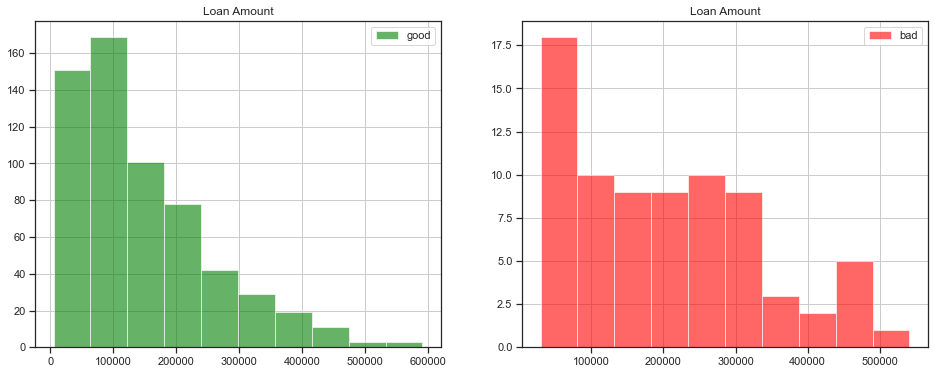

In [1016]:
## Histogram to understand distribution of good and bad loan amounts
## There is a tendency for customers to default if the loan amount is high 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
good_loans.amount.hist(bins=10, ax=ax1, label='good', color='green', alpha=0.6)
bad_loans.amount.hist(bins=10, ax=ax2, label='bad', color='red', alpha=0.6)
ax1.set_title('Loan Amount')
ax2.set_title('Loan Amount')
ax1.legend()
ax2.legend()
plt.show()


<AxesSubplot:xlabel='amount', ylabel='Count'>

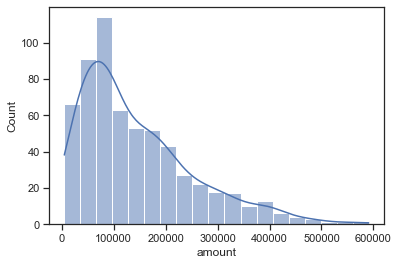

In [1017]:
sns.histplot(data=good_loans, x="amount", kde = True)

<AxesSubplot:xlabel='amount', ylabel='Count'>

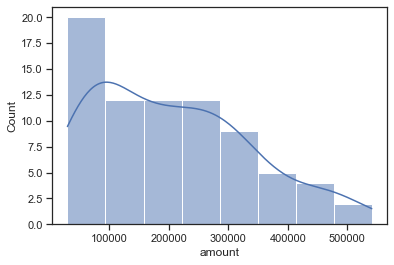

In [1018]:
sns.histplot(data=bad_loans, x="amount", kde = True)

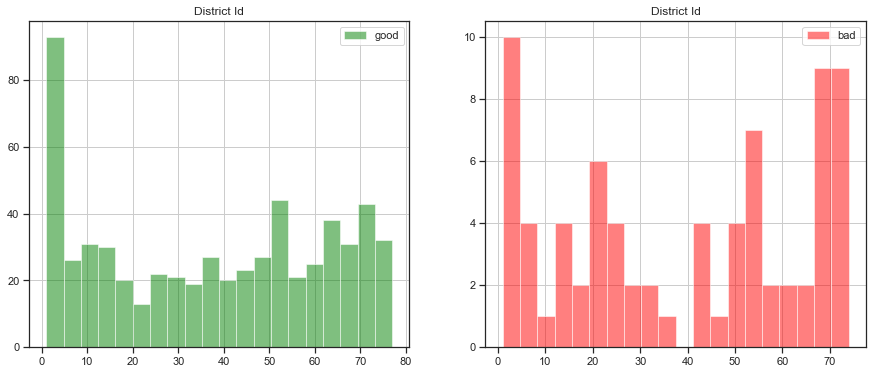

In [1019]:
## Histogram to understand distribution of District Id
## It can be observed that loan default is higher for certain districts

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
good_loans.district_id.hist(bins=20, ax=ax1, label='good', color='green', alpha=0.5)
bad_loans.district_id.hist(bins=20, ax=ax2, label='bad', color='red', alpha=0.5)
ax1.set_title('District Id')
ax2.set_title('District Id')
ax1.legend()
ax2.legend()
plt.show()

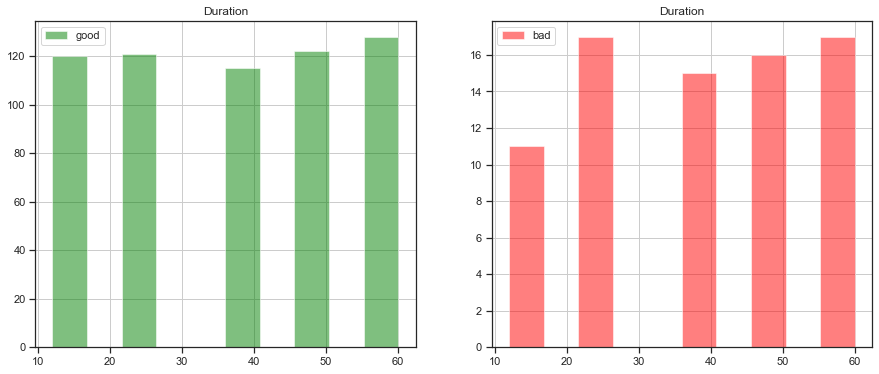

In [1020]:
## Histogram to understand distribution of Duration
## No specific pattern observed between duration and loan default

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
good_loans.duration.hist(bins=10, ax=ax1, label='good', color='green', alpha=0.5)
bad_loans.duration.hist(bins=10, ax=ax2, label='bad', color='red', alpha=0.5)
ax1.set_title('Duration')
ax2.set_title('Duration')
ax1.legend()
ax2.legend()
plt.show()

In [1021]:
## Creating new attribute number of days 
## Number of days elapsed between regular account creation date and loan account opening date
## It is possible that some people will have a tendency to apply for loan immediately after account opening

merged_df['elapsed_days'] = merged_df['loan_date'] - merged_df['account_open_date']

merged_df.head()

loan_id  account_id   loan_date  amount  duration  payments status  \
0     5314        1787  1970-01-01   96396        12    8033.0      B   
1     5316        1801  1970-01-01  165960        36    4610.0      A   
2     6863        9188  1970-01-01  127080        60    2118.0      A   
3     5325        1843  1970-01-01  105804        36    2939.0      A   
4     7240       11013  1970-01-01  274740        60    4579.0      A   

   district_id         frequency account_open_date elapsed_days  
0           30    POPLATEK TYDNE        1970-01-01       0 days  
1           46  POPLATEK MESICNE        1970-01-01       0 days  
2           45  POPLATEK MESICNE        1970-01-01       0 days  
3           12  POPLATEK MESICNE        1970-01-01       0 days  
4            1    POPLATEK TYDNE        1970-01-01       0 days

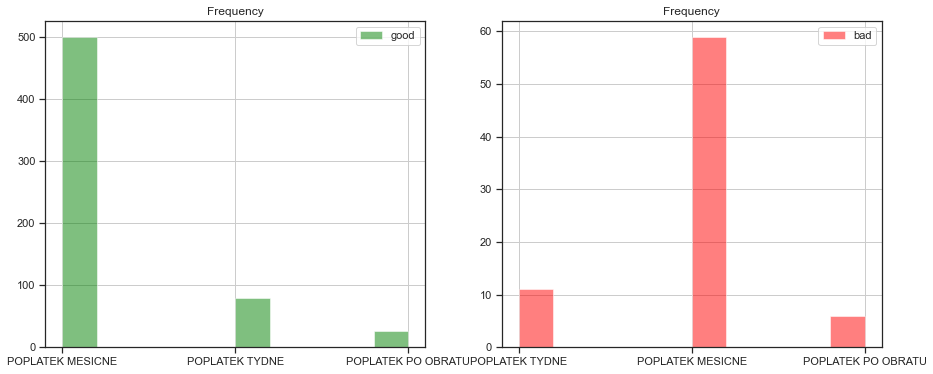

In [1022]:
## Histogram to understand relevance of Frequency of statement issue
## No apparent trend observed

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
good_loans.frequency.hist(bins=10, ax=ax1, label='good', color='green', alpha=0.5)
bad_loans.frequency.hist(bins=10, ax=ax2, label='bad', color='red', alpha=0.5)
ax1.set_title('Frequency')
ax2.set_title('Frequency')
ax1.legend()
ax2.legend()
plt.show()

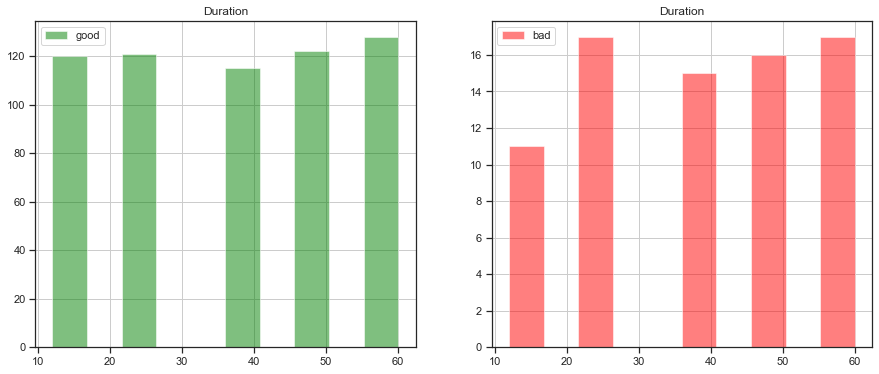

In [1023]:
## Histogram to understand relevance of Duration
## No clear trend observed for Duration

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
good_loans.duration.hist(bins=10, ax=ax1, label='good', color='green', alpha=0.5)
bad_loans.duration.hist(bins=10, ax=ax2, label='bad', color='red', alpha=0.5)
ax1.set_title('Duration')
ax2.set_title('Duration')
ax1.legend()
ax2.legend()
plt.show()

In [1024]:
## Merging loan, account and district dataframes
## Renaming column A1 in district dataframe to district id for performing join  

district.rename(columns = {'A1':'district_id'}, inplace = True)

merged_df = merged_df.merge(district, on = 'district_id')

merged_df.head()

loan_id  account_id   loan_date  amount  duration  payments status  \
0     5314        1787  1970-01-01   96396        12    8033.0      B   
1     6903        9337  1970-01-01   52128        24    2172.0      A   
2     5316        1801  1970-01-01  165960        36    4610.0      A   
3     6554        7637  1970-01-01  390096        48    8127.0      C   
4     5973        4784  1970-01-01  219456        48    4572.0      C   

   district_id         frequency account_open_date elapsed_days       A2  \
0           30    POPLATEK TYDNE        1970-01-01       0 days  Sokolov   
1           30  POPLATEK MESICNE        1970-01-01       0 days  Sokolov   
2           46  POPLATEK MESICNE        1970-01-01       0 days   Nachod   
3           46  POPLATEK MESICNE        1970-01-01       0 days   Nachod   
4           46  POPLATEK MESICNE        1970-01-01       0 days   Nachod   

             A3      A4  A5  A6  A7  A8  A9   A10   A11   A12   A13  A14  \
0  west Bohemia   94812  15  13   8   2  10  81.8  9650  3.38  3.67  100   
1  west Bohemia   94812  15  13   8   2  10  81.8  9650  3.38  3.67  100   
2  east Bohemia  112709  48  20   7   3  10  73.5  8369  1.79  2.31  117   
3  east Bohemia  112709  48  20   7   3  10  73.5  8369  1.79  2.31  117   
4  east Bohemia  112709  48  20   7   3  10  73.5  8369  1.79  2.31  117   

    A15   A16  
0  2985  2804  
1  2985  2804  
2  2854  2618  
3  2854  2618  
4  2854  2618

In [1025]:
## Renaming the columns relevant to District dataframe
## Renaming done based on Data Dictionary definitions

merged_df['num_of_inhabitants'] = merged_df.A4
merged_df['avg_salary'] = merged_df.A11
merged_df['avg_unemployment_rate'] = merged_df[['A12', 'A13']].mean(axis=1)
merged_df['entrepreneur_rate'] = merged_df['A14']
merged_df['avg_crime_rate'] = merged_df[['A15', 'A16']].mean(axis=1) / merged_df['num_of_inhabitants']

merged_df.head()

loan_id  account_id   loan_date  amount  duration  payments status  \
0     5314        1787  1970-01-01   96396        12    8033.0      B   
1     6903        9337  1970-01-01   52128        24    2172.0      A   
2     5316        1801  1970-01-01  165960        36    4610.0      A   
3     6554        7637  1970-01-01  390096        48    8127.0      C   
4     5973        4784  1970-01-01  219456        48    4572.0      C   

   district_id         frequency account_open_date elapsed_days       A2  \
0           30    POPLATEK TYDNE        1970-01-01       0 days  Sokolov   
1           30  POPLATEK MESICNE        1970-01-01       0 days  Sokolov   
2           46  POPLATEK MESICNE        1970-01-01       0 days   Nachod   
3           46  POPLATEK MESICNE        1970-01-01       0 days   Nachod   
4           46  POPLATEK MESICNE        1970-01-01       0 days   Nachod   

             A3      A4  A5  A6  A7  A8  A9   A10   A11   A12   A13  A14  \
0  west Bohemia   94812  15  13   8   2  10  81.8  9650  3.38  3.67  100   
1  west Bohemia   94812  15  13   8   2  10  81.8  9650  3.38  3.67  100   
2  east Bohemia  112709  48  20   7   3  10  73.5  8369  1.79  2.31  117   
3  east Bohemia  112709  48  20   7   3  10  73.5  8369  1.79  2.31  117   
4  east Bohemia  112709  48  20   7   3  10  73.5  8369  1.79  2.31  117   

    A15   A16  num_of_inhabitants  avg_salary  avg_unemployment_rate  \
0  2985  2804               94812        9650                   3.67   
1  2985  2804               94812        9650                   3.67   
2  2854  2618              112709        8369                   2.31   
3  2854  2618              112709        8369                   2.31   
4  2854  2618              112709        8369                   2.31   

   entrepreneur_rate  avg_crime_rate  
0                100        0.029574  
1                100        0.029574  
2                117        0.023228  
3                117        0.023228  
4                117        0.023228

In [1026]:
## Dropping some unecessary columns for refinement of the new merged dataframe

merged_df = merged_df.drop(["A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","A15","A16"], axis = 1)

merged_df.head()


loan_id  account_id   loan_date  amount  duration  payments status  \
0     5314        1787  1970-01-01   96396        12    8033.0      B   
1     6903        9337  1970-01-01   52128        24    2172.0      A   
2     5316        1801  1970-01-01  165960        36    4610.0      A   
3     6554        7637  1970-01-01  390096        48    8127.0      C   
4     5973        4784  1970-01-01  219456        48    4572.0      C   

   district_id         frequency account_open_date elapsed_days       A2  \
0           30    POPLATEK TYDNE        1970-01-01       0 days  Sokolov   
1           30  POPLATEK MESICNE        1970-01-01       0 days  Sokolov   
2           46  POPLATEK MESICNE        1970-01-01       0 days   Nachod   
3           46  POPLATEK MESICNE        1970-01-01       0 days   Nachod   
4           46  POPLATEK MESICNE        1970-01-01       0 days   Nachod   

             A3  num_of_inhabitants  avg_salary  avg_unemployment_rate  \
0  west Bohemia               94812        9650                   3.67   
1  west Bohemia               94812        9650                   3.67   
2  east Bohemia              112709        8369                   2.31   
3  east Bohemia              112709        8369                   2.31   
4  east Bohemia              112709        8369                   2.31   

   entrepreneur_rate  avg_crime_rate  
0                100        0.029574  
1                100        0.029574  
2                117        0.023228  
3                117        0.023228  
4                117        0.023228

In [1027]:
## Extracting good and bad loan status again after merging district dataframe

good_loans = merged_df.loc[(merged_df['status'] == 'A') | (merged_df['status'] == 'C')]
bad_loans = merged_df.loc[(loan['status'] == 'B') | (merged_df['status'] == 'D')]

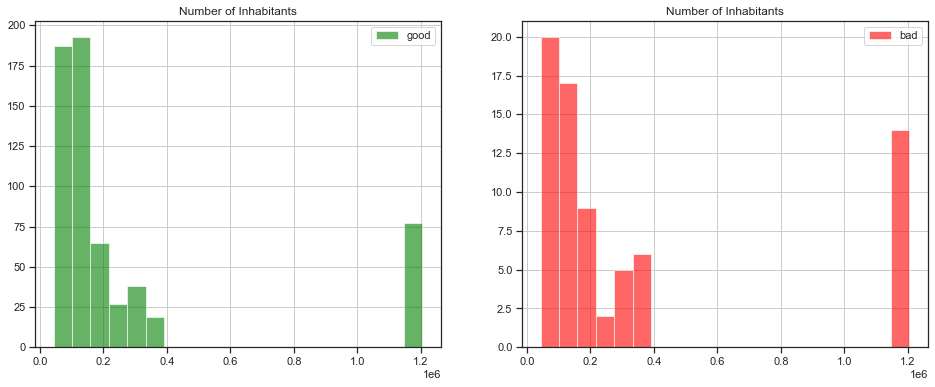

In [1028]:
## Histogram to understand relevance of number of inhabitants of an area
## It is obvious that densely populated areas have more number of defaulters

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
good_loans.num_of_inhabitants.hist(bins=20, ax=ax1, label='good', color='green', alpha=0.6)
bad_loans.num_of_inhabitants.hist(bins=20, ax=ax2, label='bad', color='red', alpha=0.6)
ax1.set_title('Number of Inhabitants')
ax2.set_title('Number of Inhabitants')
ax1.legend()
ax2.legend()
plt.show()

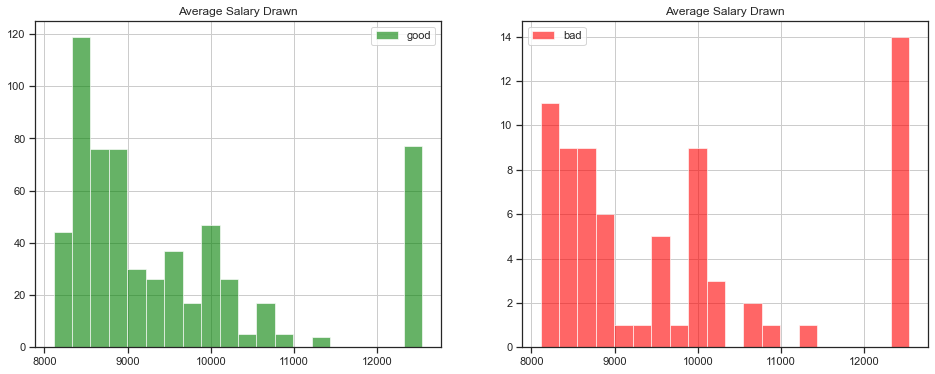

In [1029]:
## Histogram to understand relevance of average salary drawn 
## There is no clear trend visible between average salary drawn and loan default

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
good_loans.avg_salary.hist(bins=20, ax=ax1, label='good', color='green', alpha=0.6)
bad_loans.avg_salary.hist(bins=20, ax=ax2, label='bad', color='red', alpha=0.6)
ax1.set_title('Average Salary Drawn')
ax2.set_title('Average Salary Drawn')
ax1.legend()
ax2.legend()
plt.show()

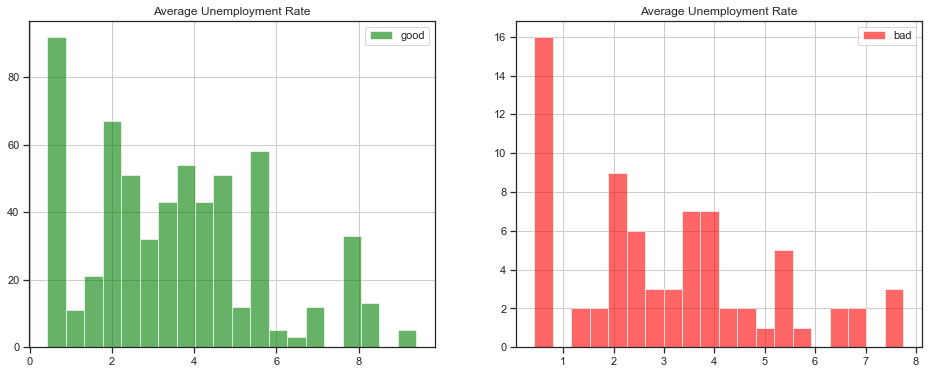

In [1030]:
## Histogram to understand relevance of average unemployment rate
## There is no clear trend visible between average unemployment rate and loan default
## The unemployment rate data is only for years 1995 and 1996

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
good_loans.avg_unemployment_rate.hist(bins=20, ax=ax1, label='good', color='green', alpha=0.6)
bad_loans.avg_unemployment_rate.hist(bins=20, ax=ax2, label='bad', color='red', alpha=0.6)
ax1.set_title('Average Unemployment Rate')
ax2.set_title('Average Unemployment Rate')
ax1.legend()
ax2.legend()
plt.show()

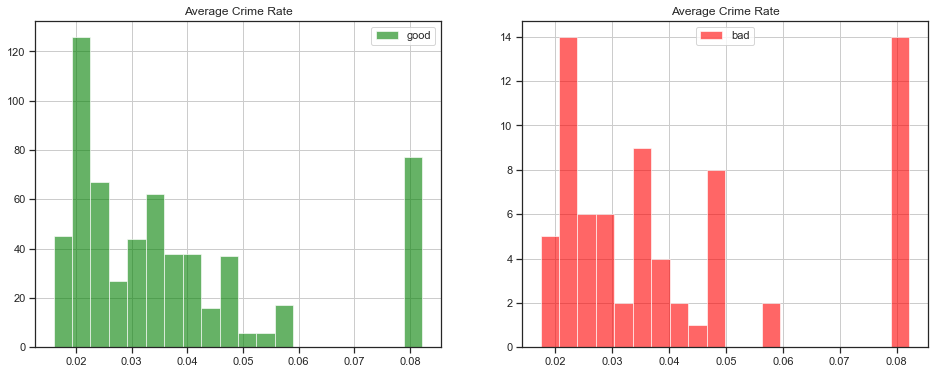

In [1031]:
## Histogram to understand relevance of average crime rate
## It appears that high crime rate is possibly associated with non payment of loans

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
good_loans.avg_crime_rate.hist(bins=20, ax=ax1, label='good', color='green', alpha=0.6)
bad_loans.avg_crime_rate.hist(bins=20, ax=ax2, label='bad', color='red', alpha=0.6)
ax1.set_title('Average Crime Rate')
ax2.set_title('Average Crime Rate')
ax1.legend()
ax2.legend()
plt.show()

In [1032]:
## Merging loan, account, district and order dataframes
## Renaming common column names for clarity

order.rename(columns = {'amount':'amount_order'}, inplace = True)

merged_df = merged_df.merge(order, on = 'account_id')

merged_df.head()



loan_id  account_id   loan_date  amount  duration  payments status  \
0     5314        1787  1970-01-01   96396        12    8033.0      B   
1     6903        9337  1970-01-01   52128        24    2172.0      A   
2     5316        1801  1970-01-01  165960        36    4610.0      A   
3     5316        1801  1970-01-01  165960        36    4610.0      A   
4     5316        1801  1970-01-01  165960        36    4610.0      A   

   district_id         frequency account_open_date elapsed_days       A2  \
0           30    POPLATEK TYDNE        1970-01-01       0 days  Sokolov   
1           30  POPLATEK MESICNE        1970-01-01       0 days  Sokolov   
2           46  POPLATEK MESICNE        1970-01-01       0 days   Nachod   
3           46  POPLATEK MESICNE        1970-01-01       0 days   Nachod   
4           46  POPLATEK MESICNE        1970-01-01       0 days   Nachod   

             A3  num_of_inhabitants  avg_salary  avg_unemployment_rate  \
0  west Bohemia               94812        9650                   3.67   
1  west Bohemia               94812        9650                   3.67   
2  east Bohemia              112709        8369                   2.31   
3  east Bohemia              112709        8369                   2.31   
4  east Bohemia              112709        8369                   2.31   

   entrepreneur_rate  avg_crime_rate  order_id bank_to  account_to  \
0                100        0.029574     32012      EF     8468449   
1                100        0.029574     43228      CD    56037777   
2                117        0.023228     32035      OP    33671474   
3                117        0.023228     32036      QR    49547737   
4                117        0.023228     32037      YZ    80957543   

   amount_order k_symbol  
0        8033.2     UVER  
1        2172.0     UVER  
2        4610.0     UVER  
3        4167.0     SIPO  
4        3419.0

In [1033]:
#temp_df = merged_df.groupby('account_id').mean()

#new_df = merged_df.set_index('account_id').join(order.groupby('account_id').mean())

#new_df.head()

#df = df.rename(columns={'order_amount': 'average_order_amount'})

In [1034]:
#temp_df.head()

In [1035]:
#merged_df = merged_df.set_index('account_id').join(temp_df)

#merged_df.head()
#df = df.rename(columns={'order_amount': 'average_order_amount'})

In [1036]:
## Calculating average order amount for each account_id



#merged_df = merged_df.groupby('account_id').mean()
#merged_df = merged_df.rename(columns={'amount_order': 'average_order_amount'})

#merged_df.head()

#merged_df = merged_df.set_index('account_id').leftjoin(merged_df.groupby('account_id').mean())

#merged_df = merged_df.groupby('account_id').mean()


#merged_df = merged_df.rename(columns={'amount_order': 'average_order_amount'})


#merged_df = merged_df.groupby('account_id').mean()
#merged_df = merged_df.reset_index()

#merged_df = merged_df.rename(columns={'amount_order': 'average_order_amount'})

merged_df.head()

loan_id  account_id   loan_date  amount  duration  payments status  \
0     5314        1787  1970-01-01   96396        12    8033.0      B   
1     6903        9337  1970-01-01   52128        24    2172.0      A   
2     5316        1801  1970-01-01  165960        36    4610.0      A   
3     5316        1801  1970-01-01  165960        36    4610.0      A   
4     5316        1801  1970-01-01  165960        36    4610.0      A   

   district_id         frequency account_open_date elapsed_days       A2  \
0           30    POPLATEK TYDNE        1970-01-01       0 days  Sokolov   
1           30  POPLATEK MESICNE        1970-01-01       0 days  Sokolov   
2           46  POPLATEK MESICNE        1970-01-01       0 days   Nachod   
3           46  POPLATEK MESICNE        1970-01-01       0 days   Nachod   
4           46  POPLATEK MESICNE        1970-01-01       0 days   Nachod   

             A3  num_of_inhabitants  avg_salary  avg_unemployment_rate  \
0  west Bohemia               94812        9650                   3.67   
1  west Bohemia               94812        9650                   3.67   
2  east Bohemia              112709        8369                   2.31   
3  east Bohemia              112709        8369                   2.31   
4  east Bohemia              112709        8369                   2.31   

   entrepreneur_rate  avg_crime_rate  order_id bank_to  account_to  \
0                100        0.029574     32012      EF     8468449   
1                100        0.029574     43228      CD    56037777   
2                117        0.023228     32035      OP    33671474   
3                117        0.023228     32036      QR    49547737   
4                117        0.023228     32037      YZ    80957543   

   amount_order k_symbol  
0        8033.2     UVER  
1        2172.0     UVER  
2        4610.0     UVER  
3        4167.0     SIPO  
4        3419.0

In [1037]:
## Merging loan, account, district, order and trans dataframes
## Renaming common column names for clarity

#trans.rename(columns = {'amount':'amount_trans'}, inplace = True)
#trans.rename(columns = {'date':'trans_date'}, inplace = True)
#trans.rename(columns = {'k_symbol':'k_symbol_trans'}, inplace = True)

#merged_df = merged_df.merge(trans, on = 'account_id')


In [1038]:
merged_df.head()

loan_id  account_id   loan_date  amount  duration  payments status  \
0     5314        1787  1970-01-01   96396        12    8033.0      B   
1     6903        9337  1970-01-01   52128        24    2172.0      A   
2     5316        1801  1970-01-01  165960        36    4610.0      A   
3     5316        1801  1970-01-01  165960        36    4610.0      A   
4     5316        1801  1970-01-01  165960        36    4610.0      A   

   district_id         frequency account_open_date elapsed_days       A2  \
0           30    POPLATEK TYDNE        1970-01-01       0 days  Sokolov   
1           30  POPLATEK MESICNE        1970-01-01       0 days  Sokolov   
2           46  POPLATEK MESICNE        1970-01-01       0 days   Nachod   
3           46  POPLATEK MESICNE        1970-01-01       0 days   Nachod   
4           46  POPLATEK MESICNE        1970-01-01       0 days   Nachod   

             A3  num_of_inhabitants  avg_salary  avg_unemployment_rate  \
0  west Bohemia               94812        9650                   3.67   
1  west Bohemia               94812        9650                   3.67   
2  east Bohemia              112709        8369                   2.31   
3  east Bohemia              112709        8369                   2.31   
4  east Bohemia              112709        8369                   2.31   

   entrepreneur_rate  avg_crime_rate  order_id bank_to  account_to  \
0                100        0.029574     32012      EF     8468449   
1                100        0.029574     43228      CD    56037777   
2                117        0.023228     32035      OP    33671474   
3                117        0.023228     32036      QR    49547737   
4                117        0.023228     32037      YZ    80957543   

   amount_order k_symbol  
0        8033.2     UVER  
1        2172.0     UVER  
2        4610.0     UVER  
3        4167.0     SIPO  
4        3419.0

In [1039]:
## Merging existing dataframe with disp

merged_df = merged_df.merge(disp, how="left", on = "account_id")

merged_df.head()

loan_id  account_id   loan_date  amount  duration  payments status  \
0     5314        1787  1970-01-01   96396        12    8033.0      B   
1     6903        9337  1970-01-01   52128        24    2172.0      A   
2     5316        1801  1970-01-01  165960        36    4610.0      A   
3     5316        1801  1970-01-01  165960        36    4610.0      A   
4     5316        1801  1970-01-01  165960        36    4610.0      A   

   district_id         frequency account_open_date elapsed_days       A2  \
0           30    POPLATEK TYDNE        1970-01-01       0 days  Sokolov   
1           30  POPLATEK MESICNE        1970-01-01       0 days  Sokolov   
2           46  POPLATEK MESICNE        1970-01-01       0 days   Nachod   
3           46  POPLATEK MESICNE        1970-01-01       0 days   Nachod   
4           46  POPLATEK MESICNE        1970-01-01       0 days   Nachod   

             A3  num_of_inhabitants  avg_salary  avg_unemployment_rate  \
0  west Bohemia               94812        9650                   3.67   
1  west Bohemia               94812        9650                   3.67   
2  east Bohemia              112709        8369                   2.31   
3  east Bohemia              112709        8369                   2.31   
4  east Bohemia              112709        8369                   2.31   

   entrepreneur_rate  avg_crime_rate  order_id bank_to  account_to  \
0                100        0.029574     32012      EF     8468449   
1                100        0.029574     43228      CD    56037777   
2                117        0.023228     32035      OP    33671474   
3                117        0.023228     32036      QR    49547737   
4                117        0.023228     32037      YZ    80957543   

   amount_order k_symbol  disp_id  client_id   type  
0        8033.2     UVER     2166       2166  OWNER  
1        2172.0     UVER    11189      11497  OWNER  
2        4610.0     UVER     2181       2181  OWNER  
3        4167.0     SIPO     2181       2181  OWNER  
4        3419.0              2181       2181  OWNER

In [1040]:
## Extracting good and bad loan status again after merging disp dataframe

good_loans = merged_df.loc[(merged_df['status'] == 'A') | (merged_df['status'] == 'C')]
bad_loans = merged_df.loc[(loan['status'] == 'B') | (merged_df['status'] == 'D')]

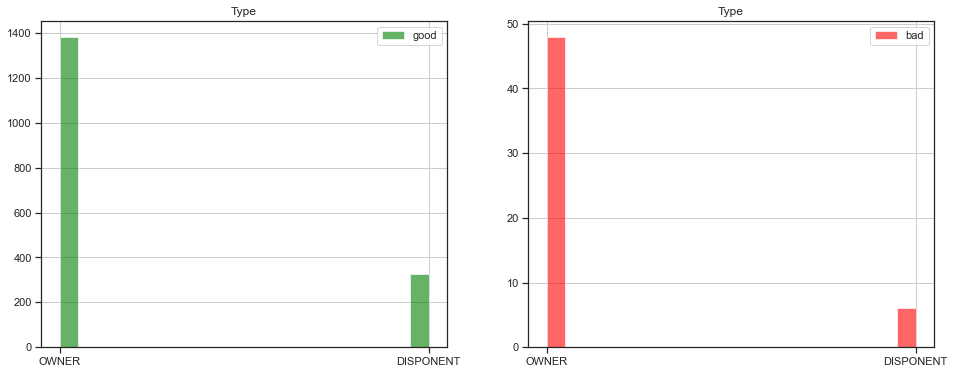

In [1041]:
## Histogram to understand relevance of type attribute of disp dataframe 
## It is evident that type OWNER have defaulted more on loans than DISPONENT

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
good_loans.type.hist(bins=20, ax=ax1, label='good', color='green', alpha=0.6)
bad_loans.type.hist(bins=20, ax=ax2, label='bad', color='red', alpha=0.6)
ax1.set_title('Type')
ax2.set_title('Type')
ax1.legend()
ax2.legend()
plt.show()

In [1042]:
## Merging with card dataframe
## Renaming common column names for clarity

merged_df.rename(columns = {'type':'disp_type'}, inplace = True)

merged_df = merged_df.merge(card, how = "left", on = "disp_id")

merged_df.head()

loan_id  account_id   loan_date  amount  duration  payments status  \
0     5314        1787  1970-01-01   96396        12    8033.0      B   
1     6903        9337  1970-01-01   52128        24    2172.0      A   
2     5316        1801  1970-01-01  165960        36    4610.0      A   
3     5316        1801  1970-01-01  165960        36    4610.0      A   
4     5316        1801  1970-01-01  165960        36    4610.0      A   

   district_id         frequency account_open_date elapsed_days       A2  \
0           30    POPLATEK TYDNE        1970-01-01       0 days  Sokolov   
1           30  POPLATEK MESICNE        1970-01-01       0 days  Sokolov   
2           46  POPLATEK MESICNE        1970-01-01       0 days   Nachod   
3           46  POPLATEK MESICNE        1970-01-01       0 days   Nachod   
4           46  POPLATEK MESICNE        1970-01-01       0 days   Nachod   

             A3  num_of_inhabitants  avg_salary  avg_unemployment_rate  \
0  west Bohemia               94812        9650                   3.67   
1  west Bohemia               94812        9650                   3.67   
2  east Bohemia              112709        8369                   2.31   
3  east Bohemia              112709        8369                   2.31   
4  east Bohemia              112709        8369                   2.31   

   entrepreneur_rate  avg_crime_rate  order_id bank_to  account_to  \
0                100        0.029574     32012      EF     8468449   
1                100        0.029574     43228      CD    56037777   
2                117        0.023228     32035      OP    33671474   
3                117        0.023228     32036      QR    49547737   
4                117        0.023228     32037      YZ    80957543   

   amount_order k_symbol  disp_id  client_id disp_type  card_id     type  \
0        8033.2     UVER     2166       2166     OWNER      NaN      NaN   
1        2172.0     UVER    11189      11497     OWNER   1103.0  classic   
2        4610.0     UVER     2181       2181     OWNER      NaN      NaN   
3        4167.0     SIPO     2181       2181     OWNER      NaN      NaN   
4        3419.0              2181       2181     OWNER      NaN      NaN   

            issued  
0              NaN  
1  951104 00:00:00  
2              NaN  
3              NaN  
4              NaN

In [1043]:
## Extracting good and bad loan status again after merging card dataframe

good_loans = merged_df.loc[(merged_df['status'] == 'A') | (merged_df['status'] == 'C')]
bad_loans = merged_df.loc[(loan['status'] == 'B') | (merged_df['status'] == 'D')]

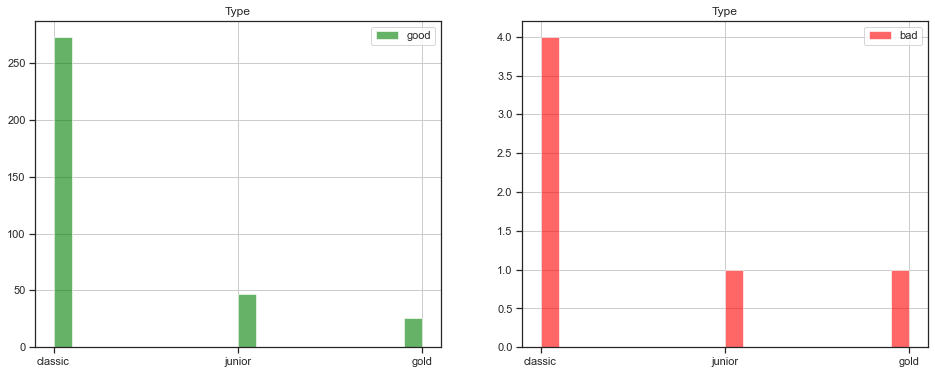

In [1044]:
## Histogram to understand relevance of type attribute of disp dataframe 
## There is no clear trend visible amongst card types
## Possibly junior and gold card type holders are defaulting similarly

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
good_loans.type.hist(bins=20, ax=ax1, label='good', color='green', alpha=0.6)
bad_loans.type.hist(bins=20, ax=ax2, label='bad', color='red', alpha=0.6)
ax1.set_title('Type')
ax2.set_title('Type')
ax1.legend()
ax2.legend()
plt.show()

In [1045]:
## Merging existing dataframe with client dataframe

#merged_df.rename(columns = {'type':'disp_type'}, inplace = True)

merged_df = merged_df.merge(client, how = "left", on = "district_id")

merged_df.head()


loan_id  account_id   loan_date  amount  duration  payments status  \
0     5314        1787  1970-01-01   96396        12    8033.0      B   
1     5314        1787  1970-01-01   96396        12    8033.0      B   
2     5314        1787  1970-01-01   96396        12    8033.0      B   
3     5314        1787  1970-01-01   96396        12    8033.0      B   
4     5314        1787  1970-01-01   96396        12    8033.0      B   

   district_id       frequency account_open_date elapsed_days       A2  \
0           30  POPLATEK TYDNE        1970-01-01       0 days  Sokolov   
1           30  POPLATEK TYDNE        1970-01-01       0 days  Sokolov   
2           30  POPLATEK TYDNE        1970-01-01       0 days  Sokolov   
3           30  POPLATEK TYDNE        1970-01-01       0 days  Sokolov   
4           30  POPLATEK TYDNE        1970-01-01       0 days  Sokolov   

             A3  num_of_inhabitants  avg_salary  avg_unemployment_rate  \
0  west Bohemia               94812        9650                   3.67   
1  west Bohemia               94812        9650                   3.67   
2  west Bohemia               94812        9650                   3.67   
3  west Bohemia               94812        9650                   3.67   
4  west Bohemia               94812        9650                   3.67   

   entrepreneur_rate  avg_crime_rate  order_id bank_to  account_to  \
0                100        0.029574     32012      EF     8468449   
1                100        0.029574     32012      EF     8468449   
2                100        0.029574     32012      EF     8468449   
3                100        0.029574     32012      EF     8468449   
4                100        0.029574     32012      EF     8468449   

   amount_order k_symbol  disp_id  client_id_x disp_type  card_id type issued  \
0        8033.2     UVER     2166         2166     OWNER      NaN  NaN    NaN   
1        8033.2     UVER     2166         2166     OWNER      NaN  NaN    NaN   
2        8033.2     UVER     2166         2166     OWNER      NaN  NaN    NaN   
3        8033.2     UVER     2166         2166     OWNER      NaN  NaN    NaN   
4        8033.2     UVER     2166         2166     OWNER      NaN  NaN    NaN   

   client_id_y  birth_number  
0           29        515911  
1          197        330425  
2          470        545421  
3          524        635102  
4          525        690814

In [1046]:
## Reformatting birth_number field to date format
## According to documentation, YYMMDD refers to Men and YY5MM50+DD is Women 

merged_df ['birth_date'] = merged_df ['birth_number']
for ids, item in enumerate (merged_df ['birth_number']):
    if int (str (item) [2:4]) > 50:
        merged_df.loc [ids, 'gender'] = 0 #Female
        merged_df.loc [ids, 'birth_date'] = item - 5000 
    else: 
        merged_df.loc [ids, 'gender'] = 1 #Male 
        
#df [col_name] = pd.to_datetime (df [col_name], format = '%y%m%d', errors = 'coerce')

merged_df['birth_date'] = pd.to_datetime(merged_df['birth_date'], format='%Y-%m-%d')
#merged_df['birth_number'] = pd.to_datetime(merged_df['birth_number']).dt.date

merged_df.head()

loan_id  account_id   loan_date  amount  duration  payments status  \
0     5314        1787  1970-01-01   96396        12    8033.0      B   
1     5314        1787  1970-01-01   96396        12    8033.0      B   
2     5314        1787  1970-01-01   96396        12    8033.0      B   
3     5314        1787  1970-01-01   96396        12    8033.0      B   
4     5314        1787  1970-01-01   96396        12    8033.0      B   

   district_id       frequency account_open_date elapsed_days       A2  \
0           30  POPLATEK TYDNE        1970-01-01       0 days  Sokolov   
1           30  POPLATEK TYDNE        1970-01-01       0 days  Sokolov   
2           30  POPLATEK TYDNE        1970-01-01       0 days  Sokolov   
3           30  POPLATEK TYDNE        1970-01-01       0 days  Sokolov   
4           30  POPLATEK TYDNE        1970-01-01       0 days  Sokolov   

             A3  num_of_inhabitants  avg_salary  avg_unemployment_rate  \
0  west Bohemia               94812        9650                   3.67   
1  west Bohemia               94812        9650                   3.67   
2  west Bohemia               94812        9650                   3.67   
3  west Bohemia               94812        9650                   3.67   
4  west Bohemia               94812        9650                   3.67   

   entrepreneur_rate  avg_crime_rate  order_id bank_to  account_to  \
0                100        0.029574     32012      EF     8468449   
1                100        0.029574     32012      EF     8468449   
2                100        0.029574     32012      EF     8468449   
3                100        0.029574     32012      EF     8468449   
4                100        0.029574     32012      EF     8468449   

   amount_order k_symbol  disp_id  client_id_x disp_type  card_id type issued  \
0        8033.2     UVER     2166         2166     OWNER      NaN  NaN    NaN   
1        8033.2     UVER     2166         2166     OWNER      NaN  NaN    NaN   
2        8033.2     UVER     2166         2166     OWNER      NaN  NaN    NaN   
3        8033.2     UVER     2166         2166     OWNER      NaN  NaN    NaN   
4        8033.2     UVER     2166         2166     OWNER      NaN  NaN    NaN   

   client_id_y  birth_number                    birth_date  gender  
0           29        515911 1970-01-01 00:00:00.000510911     0.0  
1          197        330425 1970-01-01 00:00:00.000330425     1.0  
2          470        545421 1970-01-01 00:00:00.000540421     0.0  
3          524        635102 1970-01-01 00:00:00.000630102     0.0  
4          525        690814 1970-01-01 00:00:00.000690814     1.0

### Feature Engineering

In [1047]:
## Creation the final dataframe with selected attributes for analysis purpose
## The features are selected based on previous analysis and intuition
## The feature list will undergo more refinement as we progress further

In [1048]:

final_dataframe = merged_df[['amount', 'duration', 'payments', 'num_of_inhabitants',
                           'avg_salary','avg_unemployment_rate','avg_crime_rate','status', 'gender']]

In [1049]:
final_dataframe.head()

amount  duration  payments  num_of_inhabitants  avg_salary  \
0   96396        12    8033.0               94812        9650   
1   96396        12    8033.0               94812        9650   
2   96396        12    8033.0               94812        9650   
3   96396        12    8033.0               94812        9650   
4   96396        12    8033.0               94812        9650   

   avg_unemployment_rate  avg_crime_rate status  gender  
0                   3.67        0.029574      B     0.0  
1                   3.67        0.029574      B     1.0  
2                   3.67        0.029574      B     0.0  
3                   3.67        0.029574      B     0.0  
4                   3.67        0.029574      B     1.0

In [1050]:
## Creating final dataframes for explanatory and response variables

final_dataframe_X = final_dataframe.drop("status", axis = 1)
final_dataframe_Y = copy.deepcopy(final_dataframe.status)

X = final_dataframe_X
y = final_dataframe_Y

Text(0.5, 1.0, 'Correlation Between Different Features')

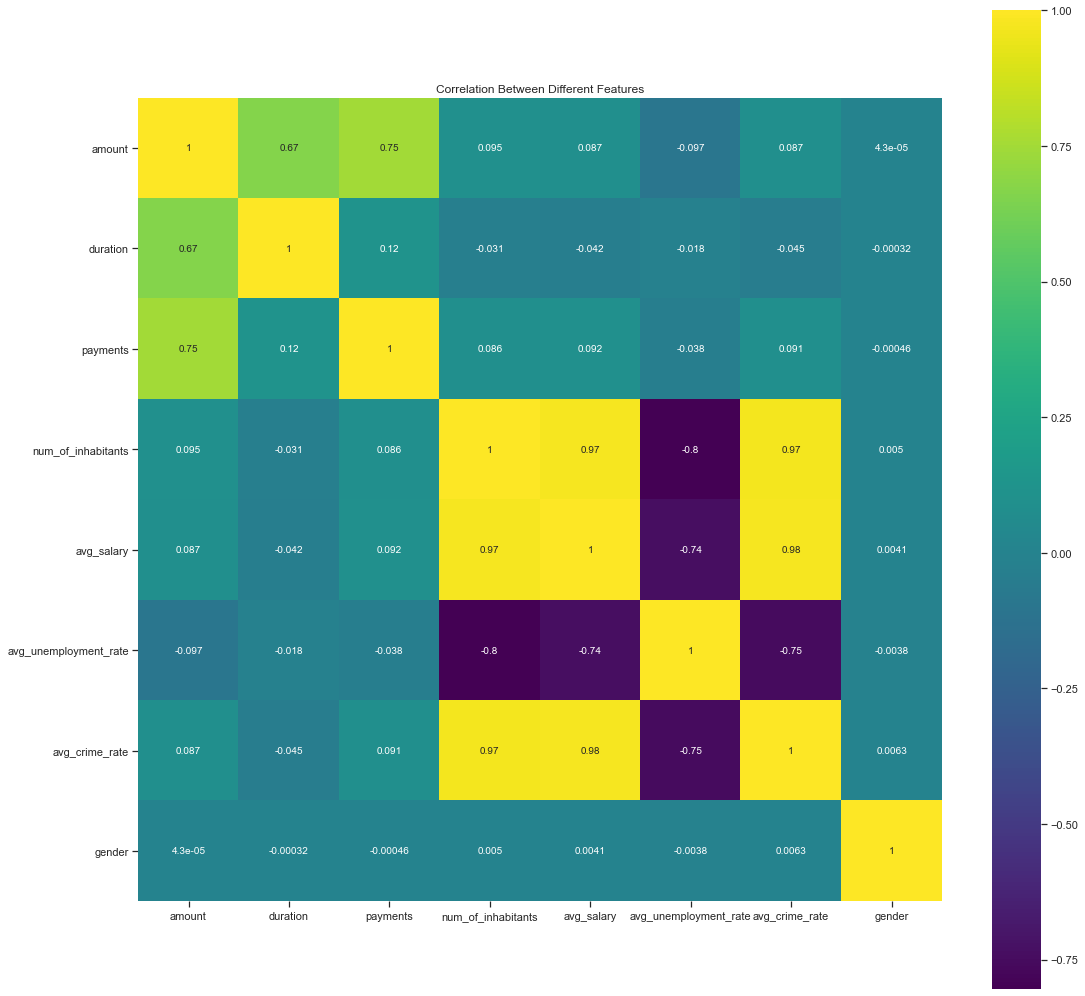

In [1051]:
## Identifying correlation between different features

correlation = final_dataframe.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation Between Different Features')


Text(0.5, 0.98, 'Pairwise Correlation Graphs')

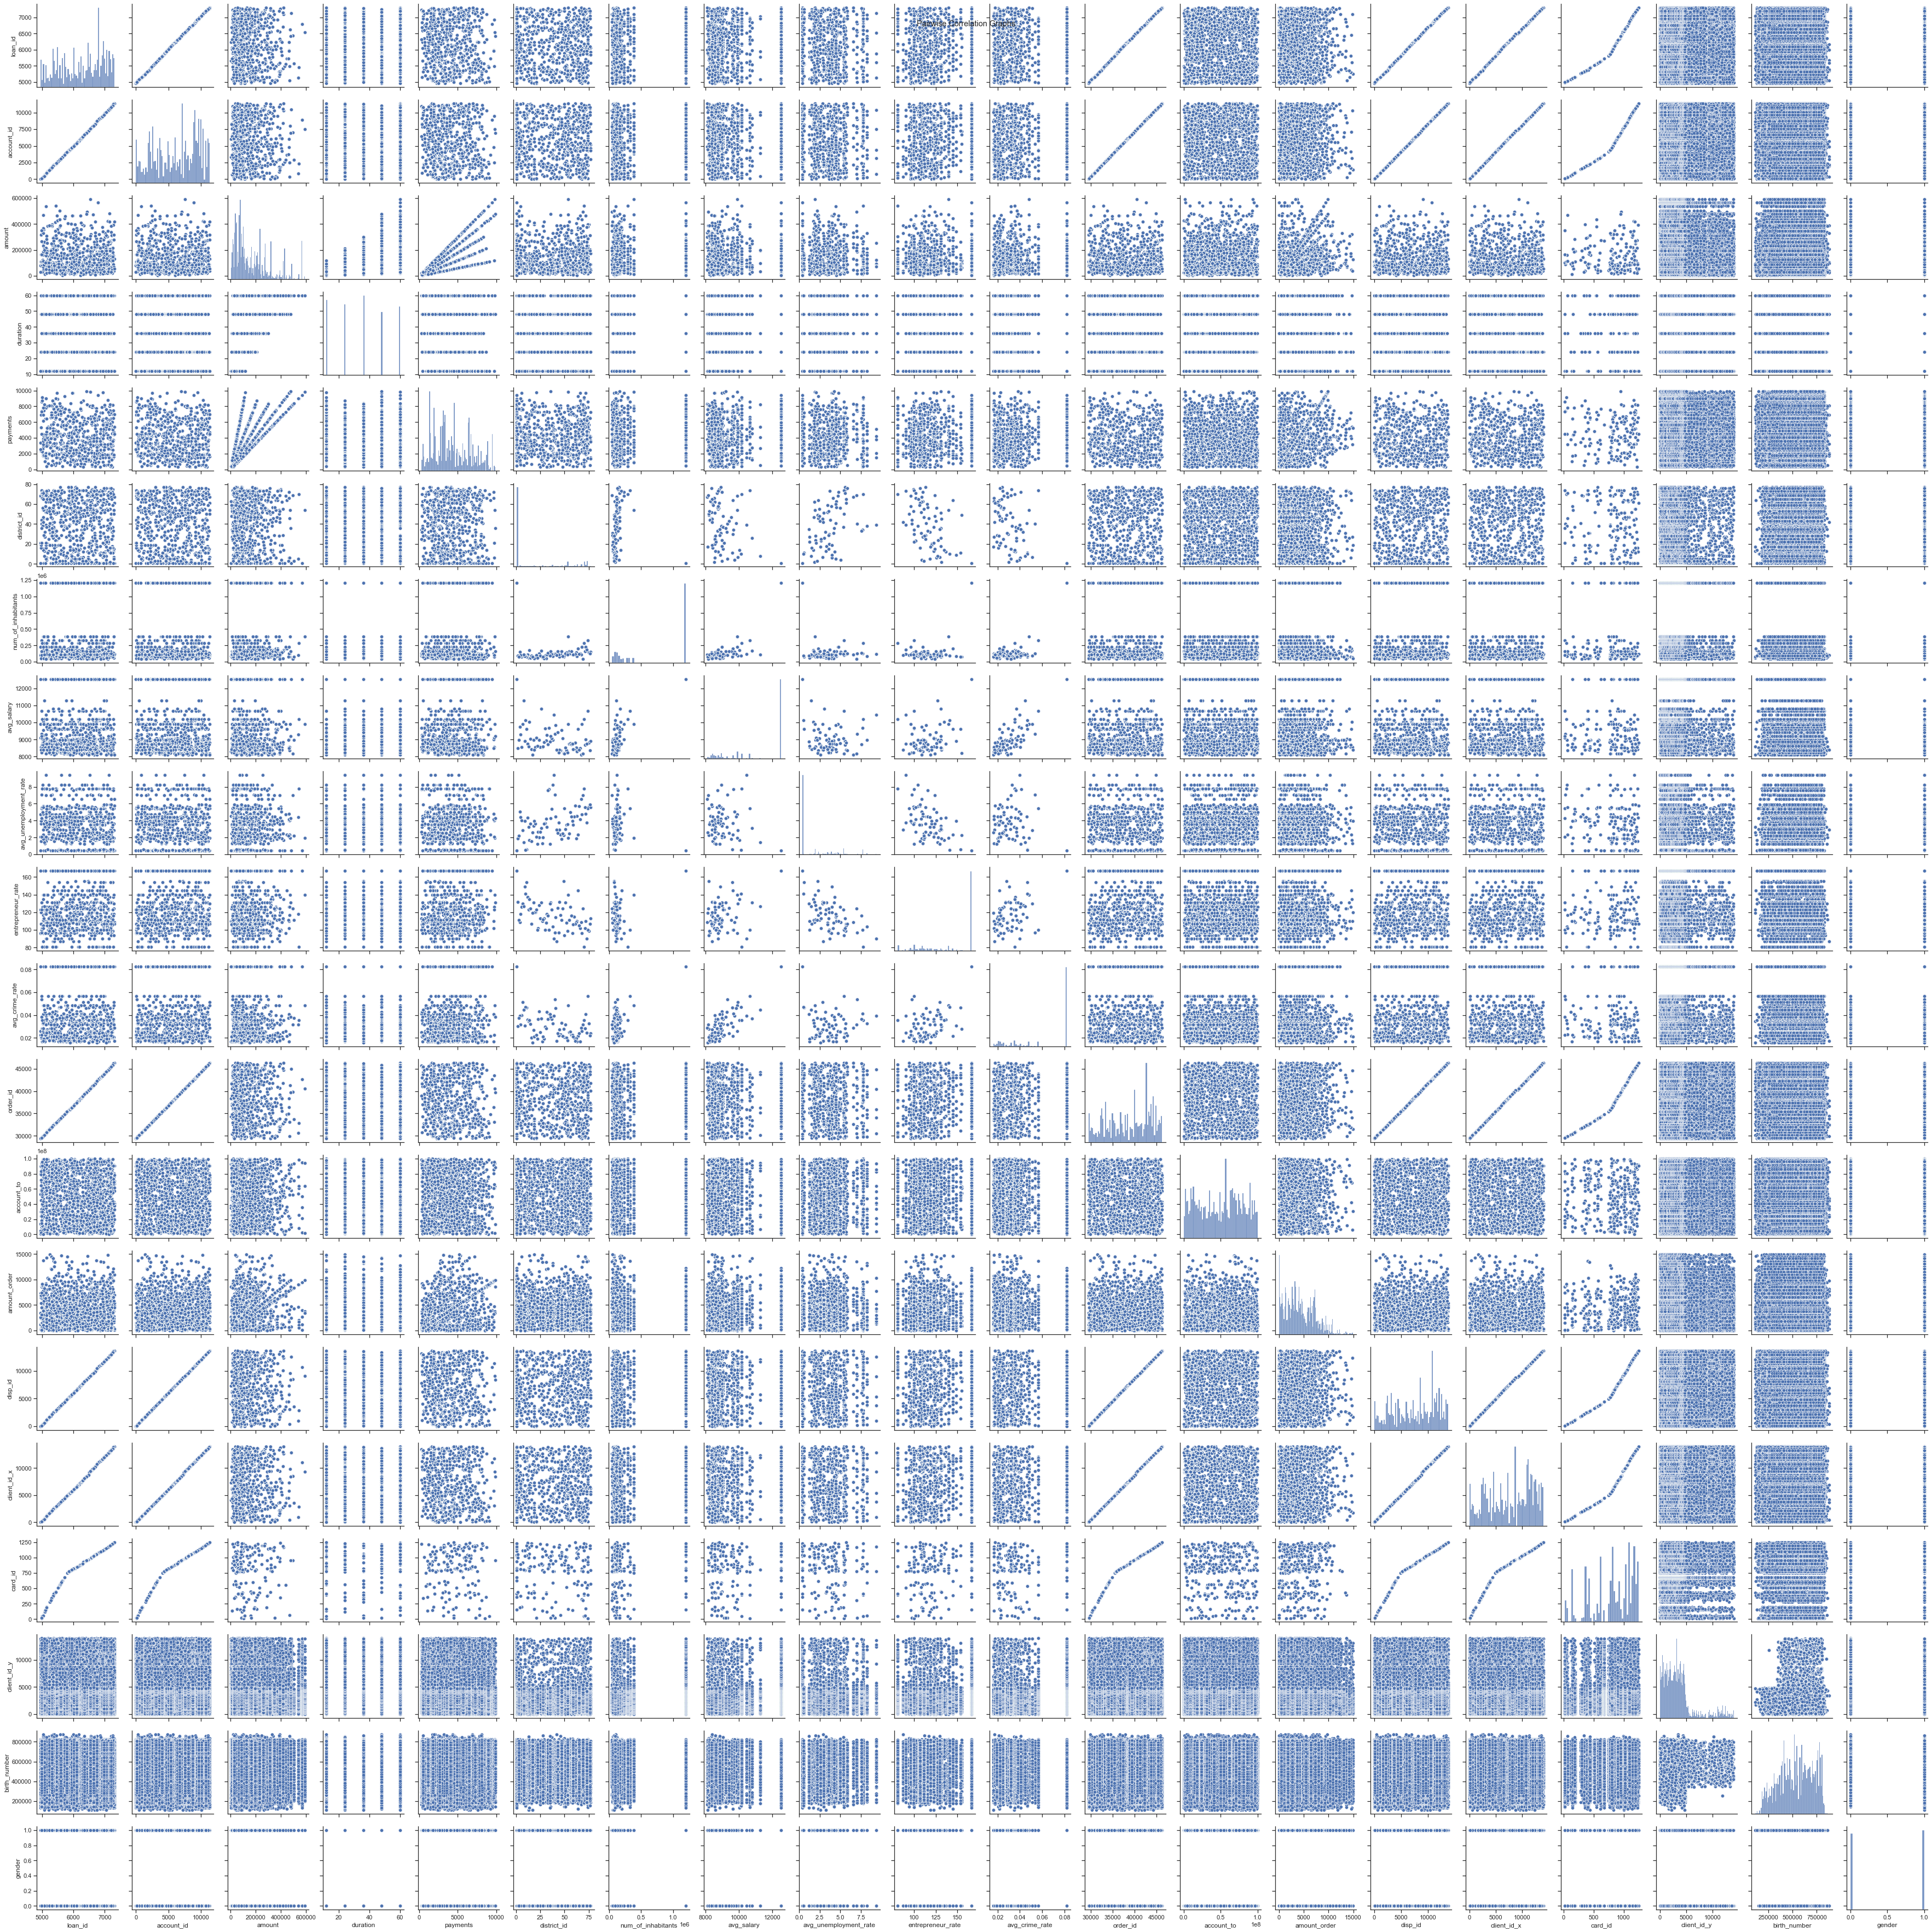

In [1052]:
## Pairwise Correlation Graphs

sns.set(style="ticks", color_codes=True)

g = sns.pairplot(merged_df)

g.fig.suptitle("Pairwise Correlation Graphs")


## Modelling

In [1053]:
## Importing necessary libraries for modeling

from sklearn.metrics import classification_report, f1_score, accuracy_score, roc_auc_score, confusion_matrix, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [1054]:
## Function block for implementing cross validation 

def testingModel(model, X_train, Y_train):
    scores = cross_val_score(model, X_train, Y_train, cv=10, scoring = "roc_auc")
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())
    return scores.mean()

In [1055]:
rfc = RandomForestClassifier(n_estimators=600)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=101)

rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)

accuracy = rfc.score(X_test, y_test)
print("Prediction Accuracy Without Cross Validation: %.2f%%" % (accuracy * 100.0))

print("Confusion Matrix: ")
print(confusion_matrix(y_test,predictions))

print("Classification Report: ")
print(classification_report(y_test,predictions))

#print("Number of trees used in the forest (n_estimators): ",rfc.)

Prediction Accuracy Without Cross Validation: 100.00%
Confusion Matrix: 
[[32511     0     0     0]
 [    0  1640     0     0]
 [    0     0 45993     0]
 [    0     0     0  3408]]
Classification Report: 
              precision    recall  f1-score   support

           A       1.00      1.00      1.00     32511
           B       1.00      1.00      1.00      1640
           C       1.00      1.00      1.00     45993
           D       1.00      1.00      1.00      3408

    accuracy                           1.00     83552
   macro avg       1.00      1.00      1.00     83552
weighted avg       1.00      1.00      1.00     83552



In [1056]:
## Implementing Random forest with cross validation



In [1057]:
## Printing the feature importance scores for all attributes

rfc.feature_importances_

array([3.60130215e-01, 1.85887130e-01, 3.01027831e-01, 4.08795410e-02,
       3.71261969e-02, 3.78145702e-02, 3.70444178e-02, 9.00985229e-05])

In [1058]:
print("Hyperparameters: ",rfc.get_params)

Hyperparameters:  <bound method BaseEstimator.get_params of RandomForestClassifier(n_estimators=600)>


In [1059]:
y_train_pred = rfc.predict(X_train)
y_train_proba = rfc.predict_proba(X_train)

In [1060]:
y_train_pred

array(['C', 'C', 'A', ..., 'A', 'C', 'C'], dtype=object)

In [1061]:
y_train_proba

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

# Future Recommendations / Insights

#### 1) More analysis is needed for individual data file attributes. A lot of attributes are unused or they can be differently interpreted to derive better insights.
#### 2) The file joins needs to be investigated more. Creation of new columns after joining the files needs more analysis. 
#### 2) Hyperparameter tuning of algorithms can be implemented to improve performance.
#### 3) Since training set has very few occurances of defaulter records as compared to positive class, suitable sampling techniques can be adopted to avoid any of kind of bias in the final model. (SMOTE)
#### 4) The confusion matrix, reported metrics is not the correct representation possibly because of dataframe structure which needs to be refined further. More analysis is needed for the same.